# GAI HW1

## Numpy

In [ ]:
import numpy as np


### 練習1：softmax 函數

In [ ]:
# 設定總共類別
c = 10
# 模擬輸出 logits
x = np.random.rand(c)

# TODO
# 定義 softmax 函數
def softmax(x):
  e_x = np.exp(x - np.max(x))
  return e_x / e_x.sum()

# 算 softmax 結果
softmax_x = softmax(x)

# print result
print(f"logits: {x}")
print(f"softmax: {softmax_x}")

logits: [0.01085904 0.67301201 0.34051849 0.13438932 0.21414113 0.58957434
 0.27773329 0.42981804 0.31413046 0.20381401]
softmax: [0.07213202 0.13986127 0.10029918 0.08161624 0.08839188 0.12866515
 0.09419549 0.10966793 0.09768709 0.08748374]


### 練習2：Linear Layer + ReLU Activation

In [ ]:
# 設定輸入維度
d_in = 10
# 設定輸出維度
d_out = 30

# 模擬神經網路輸入
x = np.ones((d_in, 1))
# 模擬神經網路權重
W = np.random.rand(d_out, d_in) * 10 - 5
# 模擬神經網路偏差值
b = np.random.rand(d_out, 1) * 10 - 5

# TODO
# ReLU Activation Function
def relu(z):
  return np.maximum(0, z)

# 計算輸出
y = relu(np.dot(W, x) + b)

# print 輸入輸出
print("神經網路輸入:\n", x)
print("神經網路輸出:\n", y)


神經網路輸入:
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
神經網路輸出:
 [[ 6.77337141]
 [ 0.        ]
 [ 0.        ]
 [ 3.30403174]
 [ 9.10553457]
 [14.80644944]
 [ 3.37442336]
 [12.33342748]
 [ 0.        ]
 [ 6.26668717]
 [ 0.        ]
 [10.61831328]
 [12.49548414]
 [ 0.53087667]
 [10.79825753]
 [ 4.86850518]
 [ 0.        ]
 [ 5.73318932]
 [ 1.97382179]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [14.95989881]
 [ 0.        ]
 [ 0.17750359]
 [ 0.43122222]
 [ 9.37248429]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]


## pandas

In [ ]:
import pandas as pd

### 練習1：數值轉換

In [ ]:
df = pd.read_csv('/content/data/467410-2022-08.csv')

# 保證僅對數值列應用轉換
# 判斷列中值是否為數字的function
def is_number(s):
  try:
      float(s)
      return True
  except ValueError:
      return False

# 將紫外線指數轉換為強度等級的function
def uv_index_to_level(uv_index):
  if is_number(uv_index):
    uv_index = float(uv_index)

    if uv_index <= 2:
        return '低'
    elif uv_index <= 5:
        return '中'
    elif uv_index <= 7:
        return '高'
    elif uv_index <= 10:
        return '甚高'
    else:
        return '極高'

  else:
    return 'Unknown'  # 若為非數字值

# 過濾掉列名或非數字的行
df = df[df['日最高紫外線指數'].apply(is_number)]

# 使用轉換的function
df['紫外線強度等級'] = df['日最高紫外線指數'].apply(uv_index_to_level)

# 計算各個等級的出現次數
level_counts = df['紫外線強度等級'].value_counts()

# 確保包括所有等級，即使某些等級的出現次數為0
all_levels = ['低', '中', '高', '甚高', '極高']
level_counts = level_counts.reindex(all_levels, fill_value=0)

# 顯示結果
print(level_counts)

低      0
中      1
高      2
甚高     4
極高    24
Name: 紫外線強度等級, dtype: int64


In [ ]:
df

,觀測時間(day),測站氣壓(hPa),海平面氣壓(hPa),測站最高氣壓(hPa),測站最高氣壓時間(LST),測站最低氣壓(hPa),測站最低氣壓時間(LST),氣溫(℃),最高氣溫(℃),最高氣溫時間(LST),...,最大六十分鐘降水量(mm),最大六十分鐘降水量起始時間(LST),日照時數(hour),日照率(%),全天空日射量(MJ/㎡),能見度(km),日最高紫外線指數,日最高紫外線指數時間(LST),總雲量(0~10),紫外線強度等級
1,01,1004.2,1007.3,1005.5,2022/08/01 22:09:00,1002.6,2022/08/01 02:00:00,29.3,33.2,2022/08/01 11:37:00,...,T,2022/08/01 16:24:00,3.1,23.4,17.11,20.0,11,2022/08/01 12:00:00,9.0,極高
2,02,1005.9,1009.0,1008.1,2022/08/02 10:34:00,1003.9,2022/08/02 16:38:00,27.5,28.9,2022/08/02 00:01:00,...,67.5,2022/08/02 09:42:00,0.0,0.0,6.34,14.0,4,2022/08/02 14:00:00,9.6,中
3,03,1006.1,1009.1,1007.3,2022/08/03 22:08:00,1004.6,2022/08/03 14:55:00,28.7,32.3,2022/08/03 11:07:00,...,T,2022/08/03 13:56:00,1.0,7.6,13.75,34.0,11,2022/08/03 11:00:00,9.4,極高
4,04,1006.7,1009.8,1008.5,2022/08/04 21:33:00,1005.4,2022/08/04 03:45:00,29.2,33.6,2022/08/04 12:51:00,...,2.0,2022/08/04 20:09:00,8.7,65.8,23.29,26.0,11,2022/08/04 11:00:00,5.0,極高
5,05,1006.7,1009.8,1007.7,2022/08/05 00:01:00,1004.8,2022/08/05 16:08:00,29.7,34.1,2022/08/05 12:16:00,...,1.0,2022/08/05 19:13:00,7.7,59.0,22.17,48.0,14,2022/08/05 12:00:00,6.4,極高
6,06,1005.5,1008.5,1007.3,2022/08/06 00:01:00,1003.4,2022/08/06 15:37:00,29.6,33.1,2022/08/06 10:37:00,...,0.5,2022/08/06 14:50:00,7.4,56.8,21.40,35.0,12,2022/08/06 13:00:00,5.6,極高
7,07,1005.3,1008.4,1007.3,2022/08/07 23:00:00,1003.4,2022/08/07 14:23:00,28.7,33.5,2022/08/07 11:55:00,...,35.0,2022/08/07 14:40:00,3.9,30.0,12.47,21.6,8,2022/08/07 12:00:00,7.2,甚高
8,08,1005.4,1008.5,1007.0,2022/08/08 00:01:00,1003.2,2022/08/08 15:21:00,29.5,34.3,2022/08/08 14:44:00,...,0.0,--,8.2,62.4,20.74,17.4,11,2022/08/08 11:00:00,5.4,極高
9,09,1005.1,1008.2,1006.8,2022/08/09 22:13:00,1003.6,2022/08/09 15:12:00,29.1,33.4,2022/08/09 12:04:00,...,11.0,2022/08/09 13:40:00,4.0,30.8,13.18,9.2,7,2022/08/09 12:00:00,8.0,高
10,10,1005.7,1008.8,1007.8,2022/08/10 21:25:00,1003.7,2022/08/10 05:50:00,28.9,34.9,2022/08/10 13:40:00,...,19.0,2022/08/10 16:04:00,7.2,54.9,20.33,22.0,13,2022/08/10 13:00:00,4.6,極高


### 練習2：條件篩選

In [ ]:
df = pd.read_csv('/content/data/467410-2022-08.csv')

# 檢查一個值是否可以轉換為浮點數的function(過濾掉Precp...)
def is_number(s):
  try:
    float(s)
    return True
  except ValueError:
    return False

# 用"0"取代"T"，並將降水量和降水時數轉換為float(過濾掉非數據行)
df['降水量(mm)'] = df['降水量(mm)'].replace('T', 0)
df = df[df['降水量(mm)'].apply(is_number)]
df['降水量(mm)'] = df['降水量(mm)'].astype(float)
df = df[df['降水時數(hour)'].apply(is_number)]
df['降水時數(hour)'] = df['降水時數(hour)'].astype(float)

# 計算降水強度(mm/hr)
df['降水強度(mm/hr)'] = df['降水量(mm)'] / df['降水時數(hour)']

# 計算降水強度的平均值
average_intensity = df['降水強度(mm/hr)'].mean()

# print出相關資訊
df[df['降水強度(mm/hr)'] > average_intensity]



,觀測時間(day),測站氣壓(hPa),海平面氣壓(hPa),測站最高氣壓(hPa),測站最高氣壓時間(LST),測站最低氣壓(hPa),測站最低氣壓時間(LST),氣溫(℃),最高氣溫(℃),最高氣溫時間(LST),...,最大六十分鐘降水量(mm),最大六十分鐘降水量起始時間(LST),日照時數(hour),日照率(%),全天空日射量(MJ/㎡),能見度(km),日最高紫外線指數,日最高紫外線指數時間(LST),總雲量(0~10),降水強度(mm/hr)
2,02,1005.9,1009.0,1008.1,2022/08/02 10:34:00,1003.9,2022/08/02 16:38:00,27.5,28.9,2022/08/02 00:01:00,...,67.5,2022/08/02 09:42:00,0.0,0.0,6.34,14.0,4,2022/08/02 14:00:00,9.6,25.277778
7,07,1005.3,1008.4,1007.3,2022/08/07 23:00:00,1003.4,2022/08/07 14:23:00,28.7,33.5,2022/08/07 11:55:00,...,35.0,2022/08/07 14:40:00,3.9,30.0,12.47,21.6,8,2022/08/07 12:00:00,7.2,13.035714
9,09,1005.1,1008.2,1006.8,2022/08/09 22:13:00,1003.6,2022/08/09 15:12:00,29.1,33.4,2022/08/09 12:04:00,...,11.0,2022/08/09 13:40:00,4.0,30.8,13.18,9.2,7,2022/08/09 12:00:00,8.0,6.764706
10,10,1005.7,1008.8,1007.8,2022/08/10 21:25:00,1003.7,2022/08/10 05:50:00,28.9,34.9,2022/08/10 13:40:00,...,19.0,2022/08/10 16:04:00,7.2,54.9,20.33,22.0,13,2022/08/10 13:00:00,4.6,9.354839
15,15,1004.1,1007.2,1005.1,2022/08/15 21:49:00,1002.9,2022/08/15 13:51:00,28.8,33.1,2022/08/15 13:36:00,...,18.5,2022/08/15 14:33:00,2.8,21.5,12.11,24.0,8,2022/08/15 14:00:00,8.2,8.200000
16,16,1004.3,1007.4,1006.0,2022/08/16 22:42:00,1002.8,2022/08/16 14:42:00,28.8,33.9,2022/08/16 11:34:00,...,14.5,2022/08/16 14:02:00,6.9,53.7,18.03,22.0,11,2022/08/16 11:00:00,5.4,9.047619
17,17,1004.8,1007.9,1006.4,2022/08/17 21:48:00,1002.9,2022/08/17 15:31:00,28.5,32.2,2022/08/17 11:51:00,...,17.0,2022/08/17 17:43:00,4.2,32.4,18.91,40.0,13,2022/08/17 13:00:00,7.2,6.511628
18,18,1004.5,1007.6,1005.8,2022/08/18 22:53:00,1003.0,2022/08/18 04:12:00,27.1,31.1,2022/08/18 10:22:00,...,29.0,2022/08/18 12:47:00,1.0,7.8,8.92,22.0,7,2022/08/18 10:00:00,9.8,12.916667


## matplotlib

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
import matplotlib
print(matplotlib.__version__)

3.7.1


### 練習1：折線圖

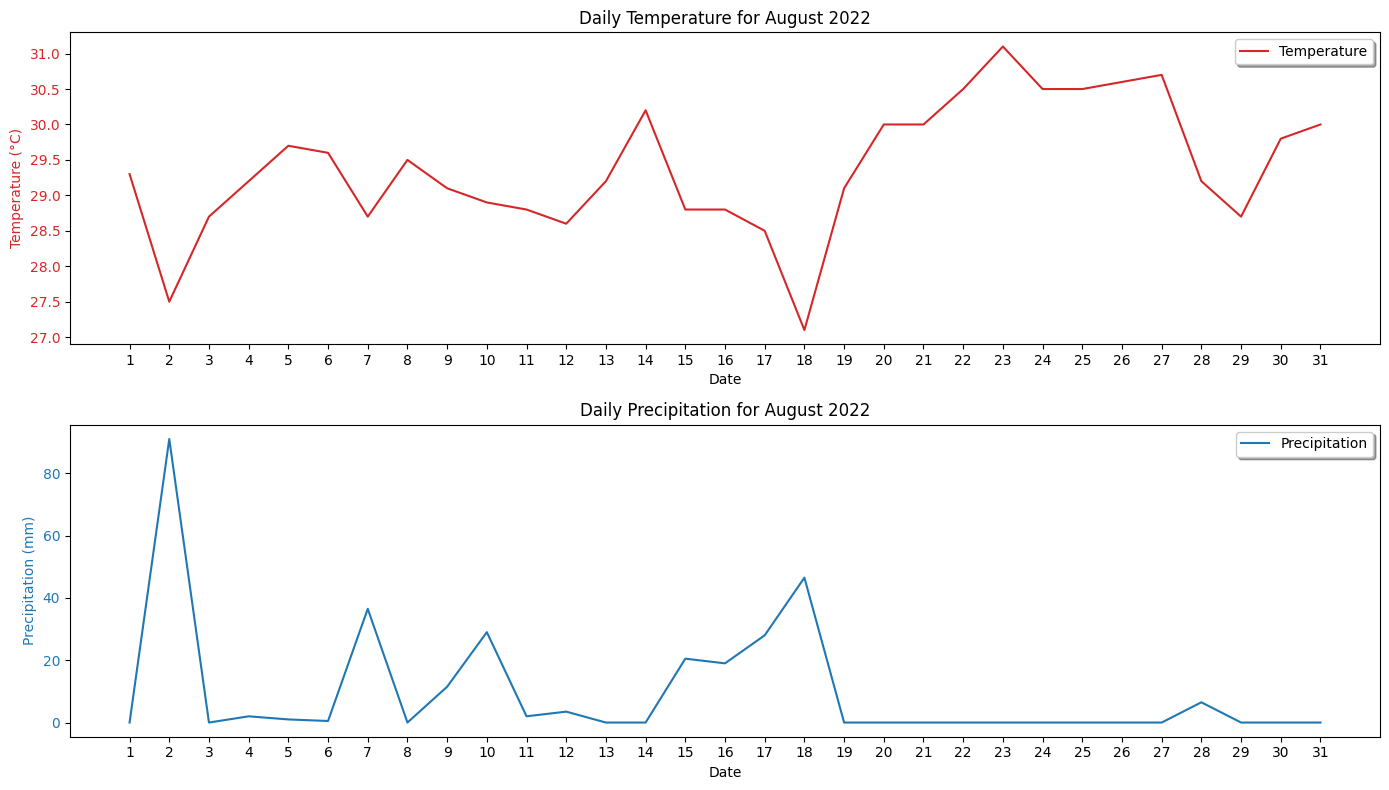

In [ ]:
df = pd.read_csv('/content/data/467410-2022-08.csv')

# 遇到'Temperature'字串跳過
if 'Temperature' in df.columns:
    df = pd.read_csv('/content/data/467410-2022-08.csv', skiprows=1)
else:
    df = df[df['氣溫(℃)'] != 'Temperature']

# Replace 'T' with 0
df['降水量(mm)'].replace('T', 0, inplace=True)
df['降水量(mm)'] = df['降水量(mm)'].astype(float)

x = np.arange(1, 32)
y1 = np.float64(df['氣溫(℃)'].values)
y2 = np.float64(df['降水量(mm)'].values)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

# 溫度圖
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='tab:red')
ax1.plot(x, y1, color='tab:red', label='Temperature')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_title('Daily Temperature for August 2022')
ax1.set_xticks(x)
ax1.set_xticklabels(x)
ax1.legend(loc='upper right', fancybox=True, shadow=True)


# 雨量圖
ax2.set_xlabel('Date')
ax2.set_ylabel('Precipitation (mm)', color='tab:blue')
ax2.plot(x, y2, color='tab:blue', label='Precipitation')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_title('Daily Precipitation for August 2022')
ax2.set_xticks(x)
ax2.set_xticklabels(x)
ax2.legend(loc='upper right', fancybox=True, shadow=True)

fig.tight_layout()
plt.show()


### 練習2：雷達圖

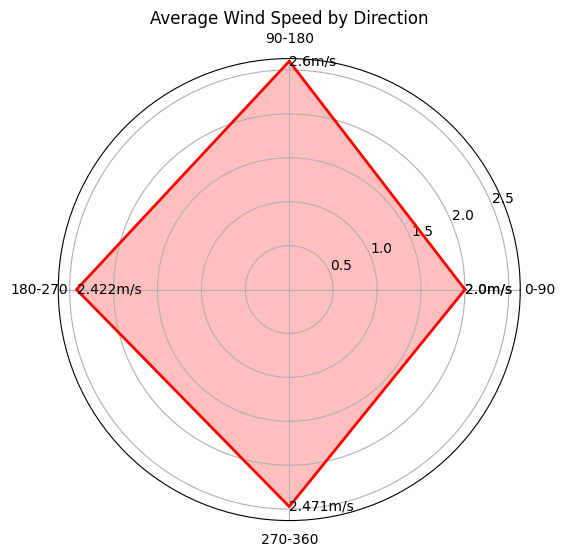

In [ ]:
df = pd.read_csv('/content/data/467410-2022-08.csv')

# 把non numeric values轉成NaN
df['風向(360degree)'] = pd.to_numeric(df['風向(360degree)'], errors='coerce')
df['風速(m/s)'] = pd.to_numeric(df['風速(m/s)'], errors='coerce')

# drop NaNs
df = df.dropna(subset=['風向(360degree)', '風速(m/s)'])

# Categorizing wind direction into four quadrants
df['DirectionCategory'] = pd.cut(df['風向(360degree)'],
                  bins=[0, 90, 180, 270, 360],
                  labels=['0-90', '90-180', '180-270', '270-360'],
                  include_lowest=True)

# 算各風向的平均風速
avg_wind_speed = df.groupby('DirectionCategory')['風速(m/s)'].mean()

# 畫雷達圖
num_vars = len(avg_wind_speed)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
avg_wind_speed = avg_wind_speed.tolist()

# 圓圖
angles += angles[:1]
avg_wind_speed += avg_wind_speed[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, avg_wind_speed, color='red', linewidth=2)
ax.fill(angles, avg_wind_speed, color='red', alpha=0.25)

# 四捨五入
for angle, speed in zip(angles, avg_wind_speed):
  speed_rounded = round(speed, 3)
  ax.text(angle, speed, f"{speed_rounded}m/s", color='black', ha='left', va='center')

# set the labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(['0-90', '90-180', '180-270', '270-360'])

# show
ax.set_title('Average Wind Speed by Direction')
plt.show()

**[註]**
由於風向資料中並未出現0度，且有出現360度，因此我將風向依以下範圍劃分，後續的平均風速也是基於這個分類去做計算：
0-90度->1度至90度；
90-180度->91度至180度；
180-270度->181度至270度；
270-360度->271度至360度

## Scikit-learn

In [ ]:
pip install scikit-learn

In [ ]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 儲存模型的工具
import pickle

In [ ]:
df = pd.read_csv('./data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape  # (列, 欄)

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 看891人中存活了多少人
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

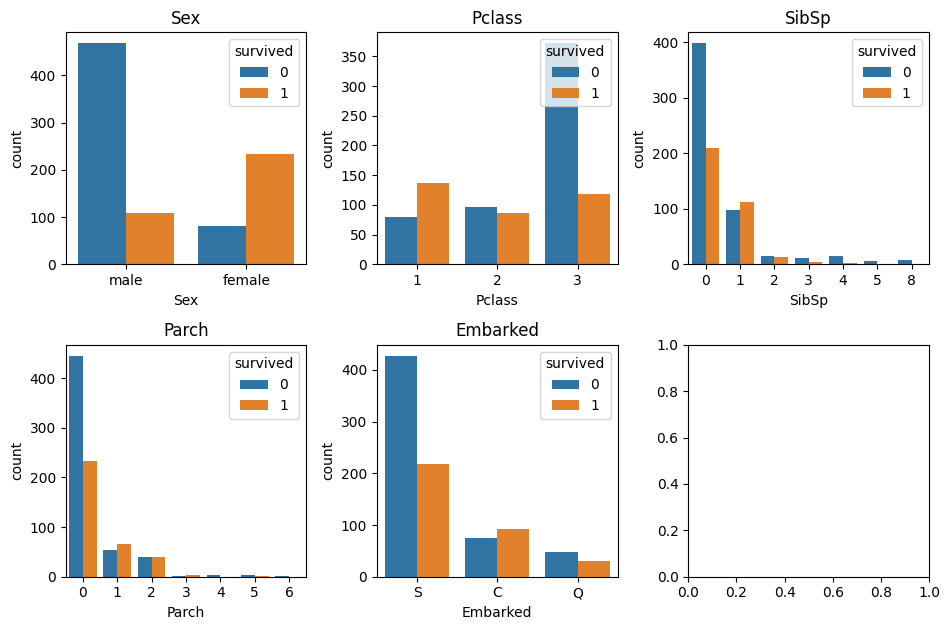

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./data/train.csv')

# 繪製圖表初步觀察存活狀況
cols = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows ,n_cols ,figsize=(n_cols*3.2, n_rows*3.2))

for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r * n_cols + c  # index to go through the number of columns
    if i < 5:
      ax = axs[r][c]    # show where to position each sub plots
      sns.countplot(data=df, x=cols[i], hue='Survived', ax=ax)
      ax.set_title(cols[i])
      ax.legend(title = 'survived', loc = 'upper right')

plt.tight_layout()
plt.show()

<ipython-input-89-e4075e5f55f4>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 0], x='Age', shade=True, label='Did Not Survive', color='red', alpha=0.5)
<ipython-input-89-e4075e5f55f4>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 1], x='Age', shade=True, label='Survived', color='green', alpha=0.5)


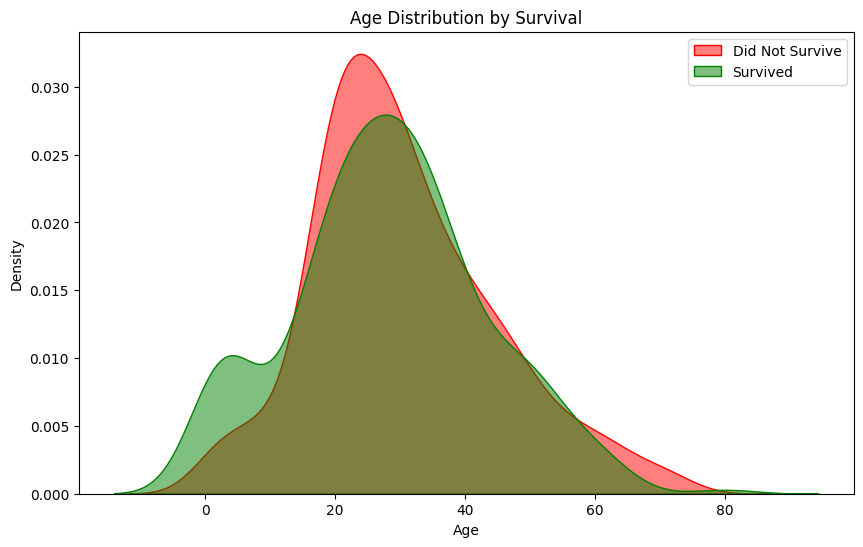

In [ ]:
df = df.dropna(subset=['Age', 'Survived'])
plt.figure(figsize=(10, 6))

# not survived
sns.kdeplot(data=df[df['Survived'] == 0], x='Age', shade=True, label='Did Not Survive', color='red', alpha=0.5)
# survived
sns.kdeplot(data=df[df['Survived'] == 1], x='Age', shade=True, label='Survived', color='green', alpha=0.5)

plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')

plt.legend()
plt.show()

<ipython-input-90-04140ac3a690>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 0], x='Fare', shade=True, label='Did Not Survive', color='red', alpha=0.5)
<ipython-input-90-04140ac3a690>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 1], x='Fare', shade=True, label='Survived', color='green', alpha=0.5)


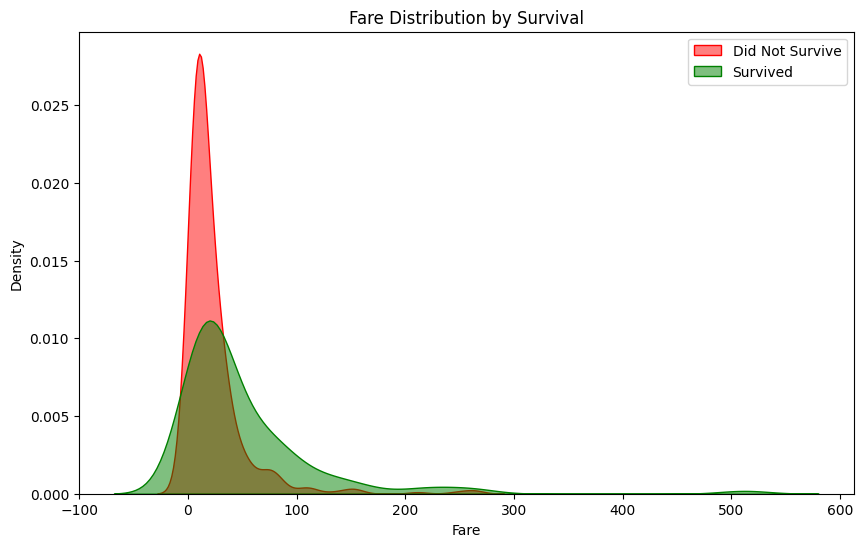

In [ ]:
df = df.dropna(subset=['Fare', 'Survived'])
plt.figure(figsize=(10, 6))

# not survived
sns.kdeplot(data=df[df['Survived'] == 0], x='Fare', shade=True, label='Did Not Survive', color='red', alpha=0.5)
# survived
sns.kdeplot(data=df[df['Survived'] == 1], x='Fare', shade=True, label='Survived', color='green', alpha=0.5)

plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Density')

plt.legend()
plt.show()

根據圖表數據初步推斷：
1. 女性存活率較高
2. 頭等艙乘客存活率較高
3. 與兄弟姊妹或老婆丈夫同行的乘客存活機率較高
4. 與父母或子女同行的乘客存活機率較高
5. 於C碼頭出發者存活機率較高
6. 未成年乘客存活機率較高
7. 票價較高的乘客存活機率較高


In [ ]:
# 查看缺失值
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# 範例code

# 匯入填補缺失值的工具
from sklearn.impute import SimpleImputer
# 匯入 Label Encoder
from sklearn.preprocessing import LabelEncoder
# 匯入決策樹模型
from sklearn.tree import DecisionTreeClassifier
# 匯入準確度計算工具
from sklearn.metrics import accuracy_score
# 匯入 train_test_split 工具
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data/train.csv')

# 取出訓練資料需要分析的資料欄位
df_x = df[['Sex', 'Age', 'Fare']]
# 取出訓練資料的答案
df_y = df['Survived']

# 數值型態資料前處理
# 創造 imputer 並設定填補策略
imputer = SimpleImputer(strategy='median')
age = df_x['Age'].to_numpy().reshape(-1, 1)
# 根據資料學習需要填補的值
imputer.fit(age)
# 填補缺失值
df_x['Age'] = imputer.transform(age)

# 類別型態資料前處理
# 創造 Label Encoder
le = LabelEncoder()
# 給予每個類別一個數值
le.fit(df_x['Sex'])
# 轉換所有類別成為數值
df_x['Sex'] = le.transform(df_x['Sex'])

# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

# 創造決策樹模型
model = DecisionTreeClassifier(random_state=1012)
# 訓練決策樹模型
model.fit(train_x, train_y)

# 確認模型是否訓練成功
pred_train = model.predict(train_x)
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)

# 輸出準確度
print('train accuracy: {}'.format(train_acc))

# 確認模型是否訓練成功
pred_test = model.predict(test_x)
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)

# 輸出準確度
print('test accuracy: {}'.format(test_acc))

train accuracy: 0.9831460674157303
test accuracy: 0.7262569832402235


<ipython-input-23-b3c67003d989>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Age'] = imputer.transform(age)
<ipython-input-23-b3c67003d989>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Sex'] = le.transform(df_x['Sex'])


 ### 練習1：改善決策樹分類模型(利用GridSearchCV找出最佳超參數)

In [113]:
# v1
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('./data/train.csv')

# 取出訓練資料需要分析的資料欄位
df_x = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
# 取出訓練資料的答案
df_y = df['Survived']

# 分類成數值型特徵和類別型特徵
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
cat_features = ['Sex', 'Embarked', 'Pclass']

# 處理數值型特徵：中位數補值 + 最小最大值標準化
num_pipeline = make_pipeline(SimpleImputer(strategy='median'), MinMaxScaler(feature_range=(0, 1)))

# 處理類別型特徵：眾數補值 + one-hot encoding
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

# 合併處理pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ])

# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

# 創造並訓練決策樹模型，包含前處理
model_pipeline = make_pipeline(
    preprocessor,
    DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=2, random_state=1012)  # 調整超參數
)

# 訓練模型
model_pipeline.fit(train_x, train_y)

# 確認模型是否訓練成功
pred_train = model_pipeline.predict(train_x)
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)

# 輸出準確度
print('training accuracy: {}'.format(train_acc))

# 確認模型是否訓練成功
pred_test = model_pipeline.predict(test_x)
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)

# 輸出準確度
print('test accuracy: {}'.format(test_acc))



training accuracy: 0.8426966292134831
test accuracy: 0.7988826815642458


In [109]:
# GridSearch part
from sklearn.model_selection import GridSearchCV

param_grid = {
    'decisiontreeclassifier__max_depth': [3, 4, 5, 6, 7],
    'decisiontreeclassifier__min_samples_split': [2, 4, 6],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 3]
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(train_x, train_y)

print('Best parameters found:', grid_search.best_params_)

pred_train_best = grid_search.predict(train_x)
pred_test_best = grid_search.predict(test_x)

train_acc_best = accuracy_score(train_y, pred_train_best)
test_acc_best = accuracy_score(test_y, pred_test_best)

print('Training accuracy with best parameters:', train_acc_best)
print('Test accuracy with best parameters:', test_acc_best)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters found: {'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__min_samples_leaf': 2, 'decisiontreeclassifier__min_samples_split': 2}
Training accuracy with best parameters: 0.8426966292134831
Test accuracy with best parameters: 0.7988826815642458


### 練習1：改善決策樹分類模型(手動調參版本)

In [114]:
# v2 (直接設置max_depth=3)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('./data/train.csv')

# 取出訓練資料需要分析的資料欄位
df_x = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
# 取出訓練資料的答案
df_y = df['Survived']

# 分類成數值型特徵和類別型特徵
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
cat_features = ['Sex', 'Embarked', 'Pclass']

# 處理數值型特徵：中位數補值 + 最小最大值標準化
num_pipeline = make_pipeline(SimpleImputer(strategy='median'), MinMaxScaler(feature_range=(0, 1)))

# 處理類別型特徵：眾數補值 + one-hot encoding
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

# 合併處理pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ])

# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

# 創造並訓練決策樹模型，包含前處理
model_pipeline = make_pipeline(
    preprocessor,
    DecisionTreeClassifier(max_depth=3, random_state=1012)  # 僅調整超參數：max_depth
)

# 訓練模型
model_pipeline.fit(train_x, train_y)

# 確認模型是否訓練成功
pred_train = model_pipeline.predict(train_x)
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)

# 輸出準確度
print('training accuracy: {}'.format(train_acc))

# 確認模型是否訓練成功
pred_test = model_pipeline.predict(test_x)
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)

# 輸出準確度
print('test accuracy: {}'.format(test_acc))


training accuracy: 0.8314606741573034
test accuracy: 0.8156424581005587


### 練習2：使用不同的模型

In [130]:
# 練習2：使用不同的模型

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

df = pd.read_csv('./data/train.csv')

# 取出訓練資料需要分析的資料欄位
df_x = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
# 取出訓練資料的答案
df_y = df['Survived']

# 分類成數值型特徵和類別型特徵
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
cat_features = ['Sex', 'Embarked', 'Pclass']

# 建立模型集合
models = {
    'GaussianNB': GaussianNB(), # Naive Bayes
    'SVC': SVC(C=5, gamma=5, probability=True, random_state=1012), # Support Vector Machine
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=3, weights='uniform'), # Nearest Neighbors
    'RandomForestClassifier': RandomForestClassifier(max_depth=6, n_jobs = 3,verbose = 1, random_state=1012),  # Random Forest
    'GradientBoostingClassifier': GradientBoostingClassifier(max_depth=2, random_state=1012) # Gradient Boosting
}

# 處理數值型特徵：中位數補值 + 最小最大值標準化
num_pipeline = make_pipeline(SimpleImputer(strategy='median'), MinMaxScaler(feature_range=(0, 1)))

# 處理類別型特徵：眾數補值 + one-hot encoding
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

# 合併處理pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ])

# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)


# DecisionTree:
# 創造並訓練決策樹模型，包含前處理
model_pipeline = make_pipeline(
    preprocessor,
    DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=2, random_state=1012)
)
# 訓練模型
model_pipeline.fit(train_x, train_y)
# 確認模型是否訓練成功
pred_train = model_pipeline.predict(train_x)
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)
# 輸出準確度
print('DecisionTreeClassifier: \n  Training accuracy: {:f}'.format(train_acc))
# 確認模型是否訓練成功
pred_test = model_pipeline.predict(test_x)
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)
# 輸出準確度
print('  Test accuracy: {:f}\n'.format(test_acc))



# 比較其他模型的結果
model_accuracies = {}

# 進行模型訓練和評估
for name, model in models.items():
    # 使用前處理管道進行訓練和預測
    pipeline = make_pipeline(preprocessor, model)
    pipeline.fit(train_x, train_y)
    # 計算訓練準確度
    pred_train = pipeline.predict(train_x)
    train_accuracy = accuracy_score(train_y, pred_train)
    # 計算測試準確度
    pred_test = pipeline.predict(test_x)
    test_accuracy = accuracy_score(test_y, pred_test)
    model_accuracies[name] = {'Training Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}

# 輸出結果
for model, accuracies in model_accuracies.items():
    print(f"{model}:")
    print(f"  Training Accuracy: {accuracies['Training Accuracy']:.4f}")
    print(f"  Test Accuracy: {accuracies['Test Accuracy']:.4f}\n")


DecisionTreeClassifier: 
  Training accuracy: 0.842697
  Test accuracy: 0.798883



[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


GaussianNB:
  Training Accuracy: 0.7921
  Test Accuracy: 0.7765

SVC:
  Training Accuracy: 0.8652
  Test Accuracy: 0.7821

KNeighborsClassifier:
  Training Accuracy: 0.8834
  Test Accuracy: 0.7709

RandomForestClassifier:
  Training Accuracy: 0.8792
  Test Accuracy: 0.7989

GradientBoostingClassifier:
  Training Accuracy: 0.8722
  Test Accuracy: 0.7989



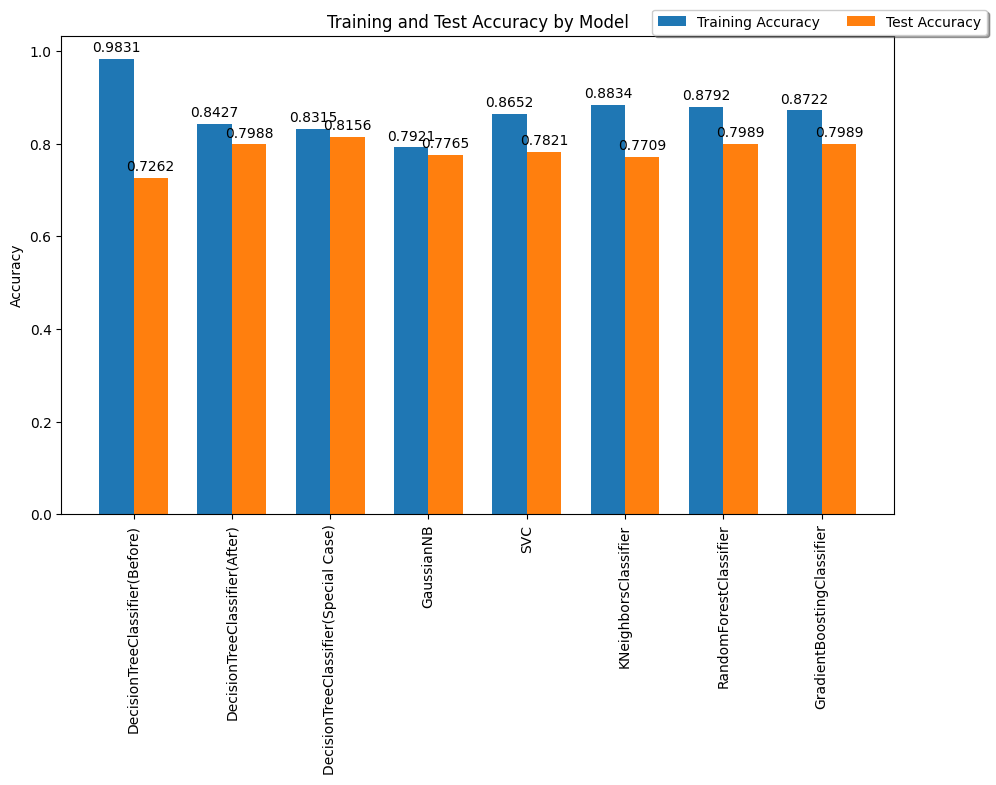

In [131]:
# 繪製長條圖比較
import matplotlib.pyplot as plt
import numpy as np

models = ['DecisionTreeClassifier(Before)', 'DecisionTreeClassifier(After)', 'DecisionTreeClassifier(Special Case)', 'GaussianNB', 'SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']

training_accuracy = [0.9831, 0.8427, 0.8315, 0.7921, 0.8652, 0.8834, 0.8792, 0.8722]
test_accuracy = [0.7262, 0.7988, 0.8156, 0.7765, 0.7821, 0.7709, 0.7989, 0.7989]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 8))
rects1 = ax.bar(x - width/2, training_accuracy, width, label='Training Accuracy')
rects2 = ax.bar(x + width/2, test_accuracy, width, label='Test Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Training and Test Accuracy by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='upper right', bbox_to_anchor=(1.12, 1.07), fancybox=True, shadow=True, ncol=2)

# 顯示accuracy數值
def add_labels(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
          xy=(rect.get_x() + rect.get_width() / 2, height),
          xytext=(0, 3),
          textcoords="offset points",
          ha='center', va='bottom')
add_labels(rects1)
add_labels(rects2)


plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [117]:
# GridSearch找各model最佳超參數

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

svc_pipeline = make_pipeline(preprocessor, SVC(random_state=1012))
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': [0.1, 1, 10]
}

svc_grid_search = GridSearchCV(svc_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svc_grid_search.fit(train_x, train_y)

print("Best parameters for SVC:", svc_grid_search.best_params_)




Best parameters for SVC: {'svc__C': 1, 'svc__gamma': 10, 'svc__kernel': 'rbf'}


In [118]:
knn_pipeline = make_pipeline(preprocessor, KNeighborsClassifier())
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
    'kneighborsclassifier__weights': ['uniform', 'distance']
}

knn_grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(train_x, train_y)

print("Best parameters for KNN:", knn_grid_search.best_params_)

Best parameters for KNN: {'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__weights': 'distance'}


In [119]:
rf_pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=1012))
param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 500],
    'randomforestclassifier__max_depth': [3, 5, 7, None],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(train_x, train_y)

print("Best parameters for RandomForest:", rf_grid_search.best_params_)

Best parameters for RandomForest: {'randomforestclassifier__max_depth': 7, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 100}


In [120]:
gb_pipeline = make_pipeline(preprocessor, GradientBoostingClassifier(random_state=1012))
param_grid = {
    'gradientboostingclassifier__n_estimators': [100, 200, 500],
    'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [3, 5, 7]
}

gb_grid_search = GridSearchCV(gb_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gb_grid_search.fit(train_x, train_y)

print("Best parameters for GradientBoosting:", gb_grid_search.best_params_)

Best parameters for GradientBoosting: {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__n_estimators': 200}
